## Best 10 career HR per AB ratio

Calculate the 10 best HR per AB ratio (HR/AB) careers. Show in a scatter the best 10 values, the horizontal axis must contain the AB and in the vertical axis the HR per AB (HR/AB). Minimun 500 AB. Use the batting data base.

Calcule los 10 mejores carreras de tasa de HR por AB (HR/AB). Muestre los diez valores en una gráfica de puntos, en el eje horizontal los turnos al bat (AB) y en el vertical los HR por turno al bat (HR/AB). Minimum 500AB. Use la base de datos Batting.csv.

### The set of databases can be found in this link. Consider it is a csv file. Find the Batting.csv data base in the Core folder.
https://github.com/chadwickbureau/baseballdatabank/tree/master/core

The raw data for the Batting data base is in

https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Parameters used in the code. Change as needed before running the code
BATTING_DATA_BASE_PATH = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv'
PEOPLE_DATA_BASE_PATH = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv'
MIN_AB = 500
NUMBER_OF_BEST_HR_PER_AB = 10

In [3]:
# Read databases and export them to a dataframe
battingDf = pd.read_csv(BATTING_DATA_BASE_PATH)
peopleDf = pd.read_csv(PEOPLE_DATA_BASE_PATH)

### Next step will take 5 minutes to complete.
### It will throw a warning since there ar players with 0 AB and it will create an exception (HR/AB)

In [5]:
# Populate the dataframe
bestHRperABDf = pd.DataFrame()
for player in peopleDf.playerID:
    HR = battingDf.loc[battingDf.playerID == player, 'HR'].sum()
    AB = battingDf.loc[battingDf.playerID == player, 'AB'].sum()
    playerHRperAB = pd.DataFrame({'playerID': player, 'HR': [HR], 'AB': [AB], 'HRperAB': HR/AB})
    bestHRperABDf = pd.concat([bestHRperABDf, playerHRperAB], ignore_index = True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7232\3755118338.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  playerHRperAB = pd.DataFrame({'playerID': player, 'HR': [HR], 'AB': [AB], 'HRperAB': HR/AB})


In [9]:
# Retrieve the n largest HR per AB careers
condition1 = bestHRperABDf.AB > MIN_AB
bestHRperABDf = bestHRperABDf.loc[condition1, ['playerID', 'HR', 'AB', 'HRperAB']].nlargest(n=NUMBER_OF_BEST_HR_PER_AB, columns = 'HRperAB')


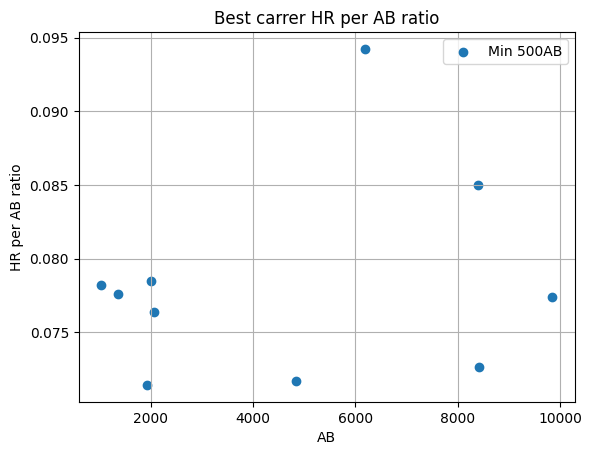

In [11]:
# Plot the best HR per AB seasons
plt.scatter(bestHRperABDf.AB, bestHRperABDf.HRperAB)
plt.grid()
plt.title('Best carrer HR per AB ratio')
plt.legend(['Min ' + str(MIN_AB) + 'AB'])
plt.xlabel('AB')
plt.ylabel('HR per AB ratio')
plt.show()